In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import date, time

%matplotlib inline

### Data exploration

In [3]:
df_year = pd.read_csv('earthquake.csv')

In [5]:
df_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        23412 non-null  object 
 1   Latitude                    23412 non-null  float64
 2   Longitude                   23412 non-null  float64
 3   Type                        23412 non-null  object 
 4   Depth                       23412 non-null  float64
 5   Depth Error                 4461 non-null   float64
 6   Depth Seismic Stations      7097 non-null   float64
 7   Magnitude                   23412 non-null  float64
 8   Magnitude Type              23409 non-null  object 
 9   Magnitude Error             327 non-null    float64
 10  Magnitude Seismic Stations  2564 non-null   float64
 11  Azimuthal Gap               7299 non-null   float64
 12  Horizontal Distance         1604 non-null   float64
 13  Horizontal Error            115

### Data Cleaning

In [4]:
#Drop columns not needed
df_year.drop(['Depth Error', 'Depth Seismic Stations', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square'], axis=1, inplace=True)

In [5]:
# check for duplicates
df_year.duplicated().sum()

0

##### Split the date column into year, month and day

In [7]:
df_year['year']=df_year.Date.str.split('/', expand=True)[2]
df_year['month']=df_year.Date.str.split('/', expand=True)[0]
df_year['day']=df_year.Date.str.split('/', expand=True)[1]

In [ ]:
# check to see if the cleaning above worked
df_year.month.value_counts()

In [14]:
#drop null values
df_year.dropna(inplace=True)

In [15]:
# check to confirm there are no null values because there were three values that were not split into day and year, there were just in month
df_year[df_year['month']=='2011-03-13T02:23:34.520Z']


,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status,year,month,day


In [22]:
# attempt at changing all months to actual month; it worked
month = ['01','02','03','04','05','06','07','08','09','10','11','12']
replace = ['January', 'February','March', 'April', 'May','June','July','August','September','October','November','December']

for i,j in zip(month, replace):
    df_year.month = df_year.month.replace(i,j)

In [24]:
# test to confirm that it worked
df_year.month.value_counts()

March        2112
August       2013
December     2001
November     1986
September    1985
April        1970
May          1964
October      1952
January      1891
July         1880
February     1828
June         1824
Name: month, dtype: int64

### Data analysis

In [16]:
df_year.corr()

,Latitude,Longitude,Depth,Magnitude
Latitude,1.000000,0.203719,-0.081023,0.035041
Longitude,0.203719,1.000000,-0.086118,0.038517
Depth,-0.081023,-0.086118,1.000000,0.023558
Magnitude,0.035041,0.038517,0.023558,1.000000


### Data visualization

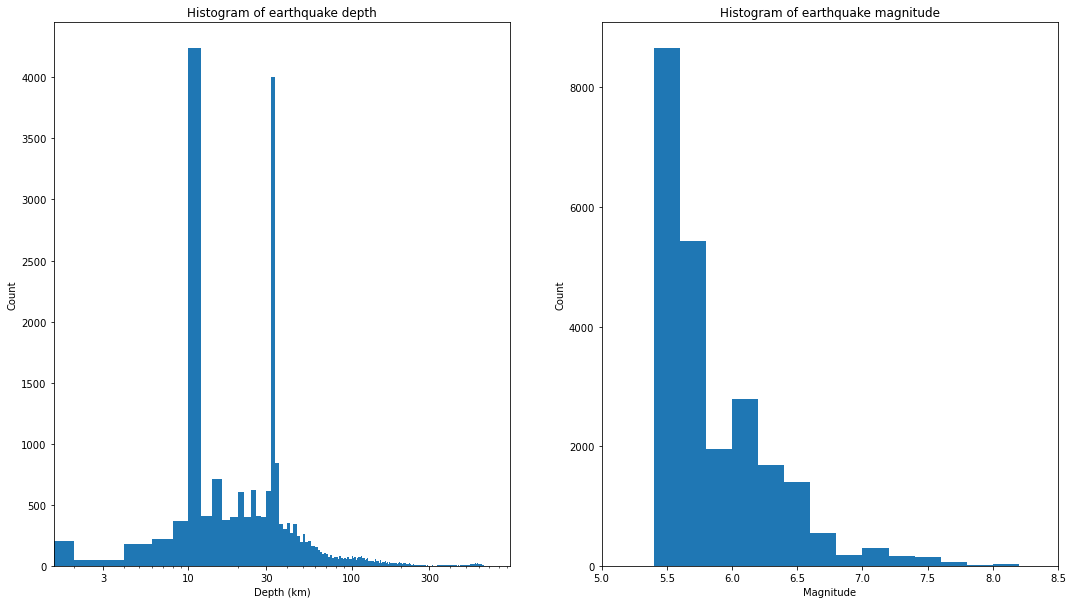

In [17]:
plt.figure(figsize=[18,10])
plt.subplot(1,2,1)
bins = np.arange(0, df_year['Depth'].max()+0.1, 2)
plt.hist(data=df_year, x='Depth', bins=bins)
plt.xscale('log')
ticks = [3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels)

plt.title('Histogram of earthquake depth')
plt.xlabel('Depth (km)')
plt.ylabel('Count')

plt.subplot(1,2,2)
bins = np.arange(0, df_year['Magnitude'].max()+0.1, 0.2)
plt.hist(data=df_year, x='Magnitude', bins=bins)
plt.xlim(5,8.5)
plt.title('Histogram of earthquake magnitude')
plt.xlabel('Magnitude')
plt.ylabel('Count');

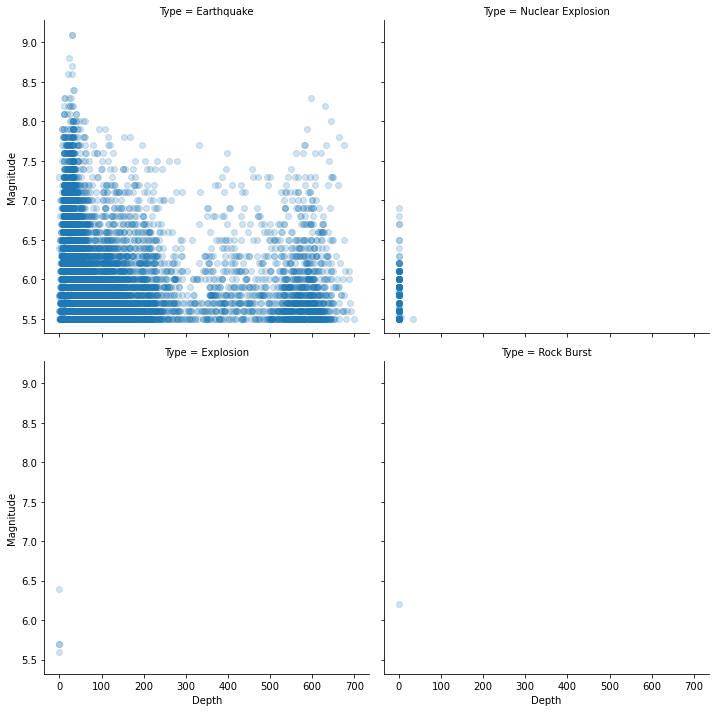

In [18]:
g = sb.FacetGrid(data = df_year, col = 'Type', height = 5, col_wrap=2)
g.map(plt.scatter, 'Depth', 'Magnitude', alpha=1/5)
g.add_legend()
#plt.xscale('log')
#ticks = [3, 10, 30, 100, 300]
#labels = ['{}'.format(v) for v in ticks]
#plt.xticks(ticks, labels)


In [19]:
df_year.Type.value_counts()

Earthquake           23226
Nuclear Explosion      175
Explosion                4
Rock Burst               1
Name: Type, dtype: int64

In [20]:
df_year.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status,year,month,day
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,01,02
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,01,04
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,MW,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,01,05
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,MW,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,01,08
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,MW,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,01,09


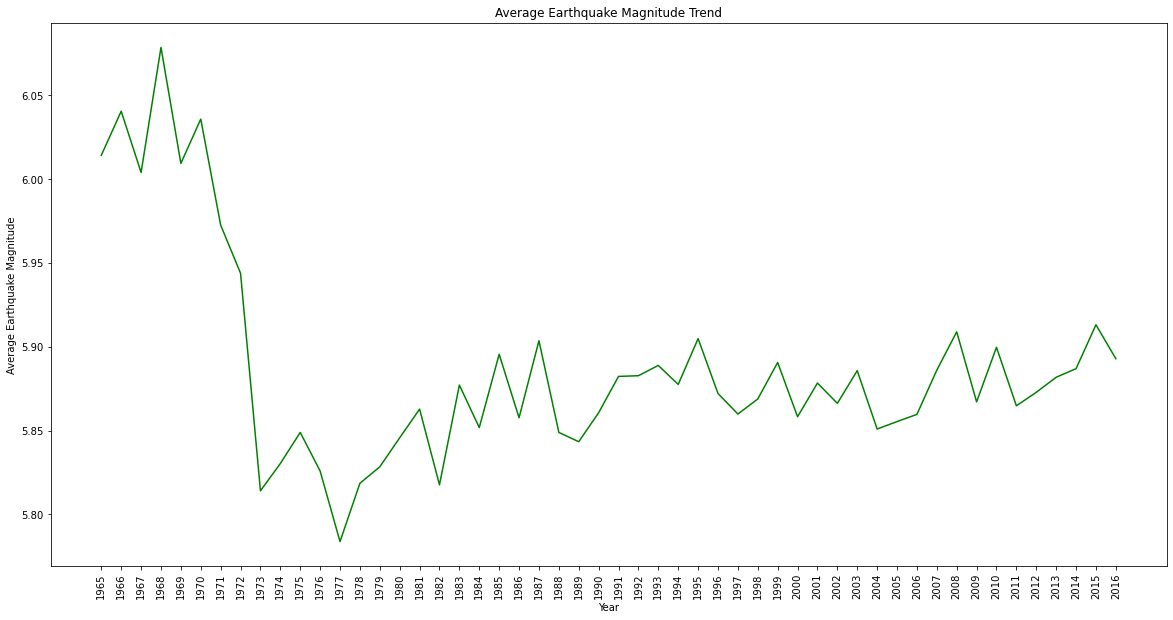

In [21]:
# Plot average earthquake magnitude trend by year
plt.figure(figsize=[20,10])
pop = df_year.groupby('year')['Magnitude'].mean()
plt.plot(pop, color='green')
plt.title('Average Earthquake Magnitude Trend')
plt.xlabel('Year')
plt.ylabel('Average Earthquake Magnitude')
plt.xticks(rotation = 90);

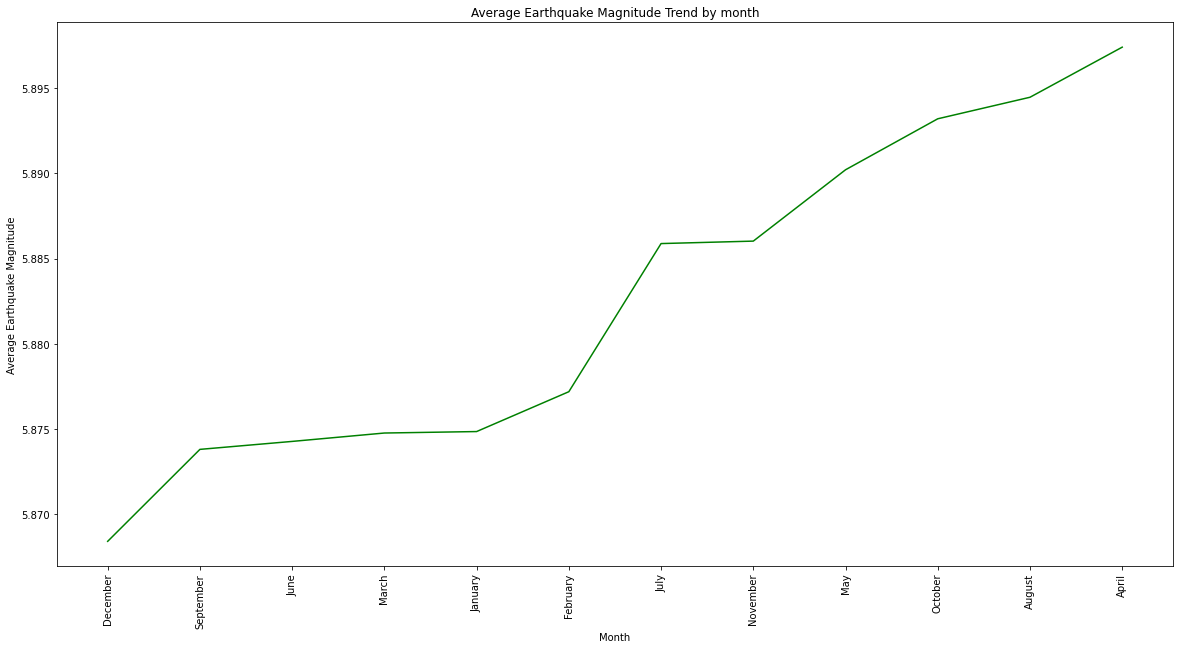

In [34]:
# Plotting earthquake magnitude by month
plt.figure(figsize=[20,10])
pop = df_year.groupby('month')['Magnitude'].mean().sort_values()
plt.plot(pop, color='green')
plt.title('Average Earthquake Magnitude Trend by month')
plt.xlabel('Month')
plt.ylabel('Average Earthquake Magnitude')
plt.xticks(rotation = 90);

In [25]:
# attempt at changing year to int so that I can plot a frequency plot of the earthquakes per year: It didn't work because of this error (TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType')
#df_year[yearin] = df_year['year'].astype(int)

In [26]:
#pd.to_numeric(df_year['year']).astype(int)

In [27]:
# Attempt at ploting the frequency of earthquakes in each year but it didn't work due to this error:TypeError: 'value' must be an instance of str or bytes, not a NoneType
#plt.hist(data=df_year, x='year')